## Final Project Submission

Please fill out:
* Student name: NYONGESA GLORIA MARIE
* Student pace: Self paced
* Scheduled project review date/time:5 days 
* Instructor name: Nikita, Karu, Lucille, Diana
* Blog post URL:


Business Understanding


Microsoft has just gotten into the movie making industry! Exciting because they are looking to leverage original video content to ensure Box office success and longevity  through revenue and profits.


Being new in this market it is vital to have an understanding of how the industry works from film quality, effective marketing, release dates and their timing, audiences and their prefered genres and every thing that contributes to a successful movie at the box-office.

This new venture requires comprehensive expertise in both the production and distribution phases. Idea development, pre-production and post production require the stake holders to have information regarding which specific genres sell well and which audiences they are for. 

Factors like marketing, promotion, theatrical releases,revenue tracking,film and festival awards and post-release marketing are part of the distribution phase: a stage that is equally as important as the production phase. Background information on Box office performance that is general or even genre specific allows the marketing team to curate strategies that work for them while also following trends. 

To discover patterns and trends in data generated on a yearly basis it is important to use Box office reporting websites, which allow search and filter of information. Annual box office reports give information about top-grossing films, genre performance and release patterns.

Objectives

1. To identify the most successful movie genres at the box office and recommend which genres to focus on.

2. To understand the relationship between audience ratings , the number of votes and box office performance to guide content creation 

3. To analyze the box office performance of movies over the years to identify trends and patterns. 

Data Understanding


The data sources to be used for this analysis will be majorly pulled ftom 2 files.

bom.movie_gross.csv

im.db

1. Load the data

In [29]:
import pandas as pd
import numpy as np
import sqlite3
import csv

Load bom.movie_gross.csv as data1. Print the first 5 rows

In [30]:
data1 = pd.read_csv('/home/marie/Documents/MORINGA/PHASE 1/PROJECT/dsc-phase-1-project-v2-4/zippedData/bom.movie_ross/bom.movie_gross.csv')
data1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Getting  farmiliar with the data

In [31]:
data1.shape

(3387, 5)

In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


"""The foreign gross columns which contains information on foreign gross revenue has beeen stored in memory as an object and not as numeric data, aso has missing values
The studio column has missing values
The domestic_gross colum also has missing values"""

Lets look at the budget table

In [58]:
data2 = pd.read_csv('/home/marie/Documents/MORINGA/PHASE 1/PROJECT/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets/tn.movie_budgets.csv')
data2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


2. Loading Data from the database

Working with the movie_basics table in im.db. Changed it to a pandas data frame

In [33]:
conn = sqlite3.connect('/home/marie/Documents/MORINGA/PHASE 1/PROJECT/dsc-phase-1-project-v2-4/zippedData/imdb/im.db')
query1 = "SELECT * FROM movie_basics"
df = pd.read_sql(query1, conn)


In [34]:
df.shape

(146144, 6)

In [35]:
df.head(6)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


"""This data set contains 146144 rows and 5 columns. There are missing values in 3 columns: original_title, run_time minutes, genres

Second table is the movie_ratings table

In [37]:
conn = sqlite3.connect('/home/marie/Documents/MORINGA/PHASE 1/PROJECT/dsc-phase-1-project-v2-4/zippedData/imdb/im.db')
query2 = "SELECT* FROM movie_ratings"
df1 = pd.read_sql(query2, conn)

In [38]:
df1.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [39]:
df1.shape

(73856, 3)

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


This table contains 73856 rows. There are no missing values in any column

DATA PREPARATION

This phase of the data involves 1. Checking the relations of different data sets, and finally cleaning the data.

Taking alook at the 3 tables we have loaded into data frames, movie_basics and movie_rating have a common column which is movie_id.It is probable that movie_id column in the movie_basics table is a primary key, but in the movie_ratings table it probably refers to the primary key in the movie_basics table.

This common column means that we can join/ merge the movie-basics table and the movie_ratings table.

DATA CLEANING

Clean data is a necessity if one wants accurate analysis and insights.Successful business operations are built on informed decision making which is achieved by using clean data in the data analysis process. 

The type of data determines the kind of cleaning that will be undertaken. Different types of data require different clening methods.All of these data cleaning methods also address different issues in relation to data quality.Unnecessary or incorect cleaning of the data can introduce errors into the data.

Working with the different objectives to try and give valuable insights that can inform Microsoft's decision-making.


OBJECTIVE 1
1. To compare the performance of different studios in terms of domestic an foreign gross.Identify the top performing studios.

In order provide accurate information to be used for genre recommendation i will focus on domestic and foreign gross columns of the first table. 

From data1.info() domestic_gross column is missing 28 values whereas the foreign_gross table is missing 1350 values. The values in foreign_gross are of type object instead of a numerical value.

The values missing in foreign gross are 1350 making such a large number considering that the analysis is based on this column. Removing this rows with missing data might lead to loss of data that may be important

Converting the values in foreign_gross column to a numerical type, since it contains object types. This allows me to calculate the mean and impute it in the missing values.

Use the .str.replace() methods to remove spaces and commas from the column making it a valid numerical column name

Use the .astype(float) method to convert the column to a float datatype

In [41]:
data1['foreign_gross'] = data1['foreign_gross'].str.replace(',','', regex= True).astype(float)

Calcuate the mean of that column after conversion

In [42]:
mean_value = data1['foreign_gross'].mean()
mean_value

74872810.15046637

In [43]:
round_mean = round(mean_value, 2)
round_mean

74872810.15

Impute missing 'foreign_gross' values with calculated mean values

In [44]:
data1['foreign_gross'].fillna(mean_value, inplace = True)

Check if there are any remaining missing values. using the isnull() and sum()

In [45]:
missing_values = data1.isnull().sum()
missing_values

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

Looking at the domestic_gross column, it has 28 missing values. Choosing to remove can lead to loss of valuable information.Lets check for outliers in the data, that may affect analysis  

Checked for outliers using the iqr method.

In [46]:
Q1 = data1['domestic_gross'].quantile(0.25)
Q3 = data1['domestic_gross'].quantile(0.75)
iqr = Q3-Q1
outliers = data1[(data1['domestic_gross'] < Q1 - 1.5 * iqr) | (data1['domestic_gross'] > Q3 + 1.5 * iqr)]
outliers_values = outliers['domestic_gross']
outliers_values

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3120     99200000.0
3121    102100000.0
3123    103800000.0
3129    100500000.0
3136     77300000.0
Name: domestic_gross, Length: 406, dtype: float64

406 records of values that meet the outlier criteria based on the domestic_gross column. My objective is to identify the most successful movie genres so maybe removing the values i consider as outliers might significantly change my genre recommendations.

In [47]:
mean_gross =  data1['domestic_gross'].mean()
mean_gross

28745845.06698422

In [48]:
roundm = round(mean_gross, 2)
roundm

28745845.07

Imputing the missing values in the domestic_gross column

In [49]:
data1['domestic_gross'].fillna(roundm, inplace = True)

Checking if there anre any missing values

In [50]:
missing_sum = data1.isnull().sum()
missing_sum

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

I have successfully removed the missing values from all the columns  apart from the studio column. Since it contains few missing values, it would be best to just delete all the missing values

In [51]:
data1.dropna(subset=['studio'],inplace = True)
missing_sum = data1.isnull().sum()
missing_sum

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

DATA ANALYSIS

Data analysis is done to gain preliminary insights on the data, It invloves calculating summary statistics, identifying correlations and making observations after creating visualizations

In order to determine which studios have been performing well in terms of domestic and foreign box office revenue and profitability:Conduct revenue analyses


STEP 1: Calculate the total domestic and foreign box office revenue for each movie studio

To group the data based on the 'studio column we can make use of groupby() fuction. The group by function creates a data frame group by object,a special type of DataFrame that represents the grouped data.The sum() function is used to summ up the 'domestic_gross' and foreign_gross columns in every group

In [142]:

totals = data1.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()
totals

,domestic_gross,foreign_gross
studio,,
3D,6.100000e+06,9.900000e+06
A23,1.642000e+05,1.497456e+08
A24,3.241942e+08,2.484647e+09
ADC,2.482000e+05,1.497456e+08
AF,2.142900e+06,3.029912e+08
...,...,...
XL,4.580000e+05,1.497456e+08
YFG,1.100000e+06,7.487281e+07
Yash,6.037725e+07,7.969348e+08


STEP 2:Calculate Average domestic and foreign gross for each studio. Using groupby() function

In [144]:

averages = data1.groupby('studio')[['domestic_gross', 'foreign_gross']].mean()
averages


,domestic_gross,foreign_gross
studio,,
3D,6.100000e+06,9.900000e+06
A23,8.210000e+04,7.487281e+07
A24,6.616208e+06,5.070707e+07
ADC,1.241000e+05,7.487281e+07
AF,3.571500e+05,5.049854e+07
...,...,...
XL,2.290000e+05,7.487281e+07
YFG,1.100000e+06,7.487281e+07
Yash,4.312660e+06,5.692391e+07


STEP3: Identify Top-performing Studio

In [145]:

top_studio_domestic = totals.sort_values('domestic_gross', ascending=False).head(10)
top_studios_foreign = totals.sort_values('foreign_gross', ascending=False).head(10)


In [146]:
top_studio_domestic 
top_studios_foreign



,domestic_gross,foreign_gross
studio,,
BV,1.841903e+10,2.594360e+10
Fox,1.094950e+10,2.020561e+10
WB,1.216805e+10,1.941663e+10
Uni.,1.290239e+10,1.707939e+10
Sony,8.488429e+09,1.424485e+10
Par.,7.685871e+09,1.238749e+10
IFC,1.126629e+08,7.736265e+09
Magn.,6.355970e+07,6.569826e+09
WB (NL),3.995700e+09,6.413873e+09


These are the top performing studios based on total domestic and foreign gross columns.

VISUALIZATIONS

Creating a bar chart to compare revenue and profitability of different studios

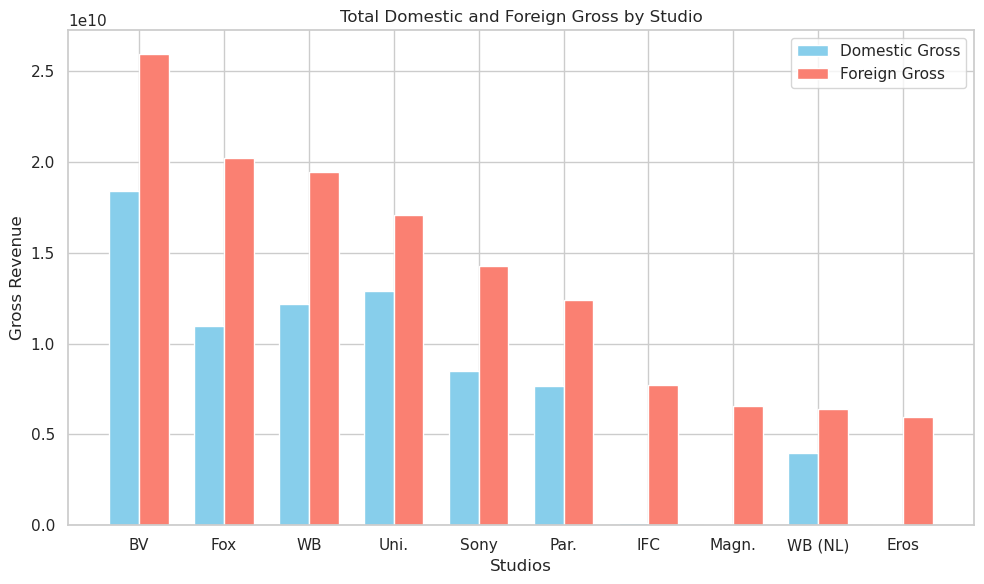

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Data for studios and their total domestic and foreign gross
studios = ['BV', 'Fox', 'WB', 'Uni.', 'Sony', 'Par.', 'IFC', 'Magn.', 'WB (NL)', 'Eros']
domestic_gross = [1.841903e+10, 1.094950e+10, 1.216805e+10, 1.290239e+10, 8.488429e+09, 7.685871e+09, 1.126629e+08, 6.355970e+07, 3.995700e+09, 8.405510e+07]
foreign_gross = [2.594360e+10, 2.020561e+10, 1.941663e+10, 1.707939e+10, 1.424485e+10, 1.238749e+10, 7.736265e+09, 6.569826e+09, 6.413873e+09, 5.954700e+09]

# Create an array for the x-axis positions
x = np.arange(len(studios))

# Define the width of each bar
bar_width = 0.35

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, domestic_gross, bar_width, label='Domestic Gross', color='skyblue')
plt.bar(x + bar_width/2, foreign_gross, bar_width, label='Foreign Gross', color='salmon')

# Set labels, title, and legend
plt.xlabel('Studios')
plt.ylabel('Gross Revenue')
plt.title('Total Domestic and Foreign Gross by Studio')
plt.xticks(x, studios)
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()


RECOMMENDATIONS

BV.Studio appears to have the highest  

OBJECTIVE 2

To analyze the relationship between population budgets and domestic/ worldwide gross. This will help us establish if higher budgets result in higher gross revenue


This will take our focusto the data2 data frame that consists of monetary values representing budget and revenue.

The data frame lacks any missing values but has 3 columns with the wrong data type. To fix that we are going to use the .str.replace() and the .astype()

In [60]:
data2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [66]:
data2['production_budget'] = data2['production_budget'].str.replace(',','', regex= True)
data2['domestic_gross'] = data2['domestic_gross'].str.replace(',','', regex= True)
data2['worldwide_gross'] = data2['worldwide_gross'].str.replace(',','', regex= True)

I have managed to remove all the ',' values in the 3 columns now to remove te dollar sign:

Define a function to remove special characters and convert the data to a numeric type. I have imported re which is a module that stands for "regular expressions." It provides functions and classes for working with regular expressions, which are powerful tools for pattern matching and text manipulation. I am also going to be using the .apply() method which takes in the method i have declared

In [76]:
import re

In [81]:
def remove_dollar_sign(x):
    if isinstance(x, str):
        return float(re.sub(r'[^\d.]','',x))     
    else:
        return x  

This method uses regular expressions to remove non-numeric characters and converts the resultant to a float

Applying the remove_dollar_sign function to my columns using apply()

In [82]:
data2['production_budget'] = data2['production_budget'].apply(remove_dollar_sign)


In [83]:
data2['domestic_gross'] = data2['domestic_gross'].apply(remove_dollar_sign)

In [84]:
data2['worldwide_gross'] = data2['worldwide_gross'].apply(remove_dollar_sign)


Printing the data frame to check my rows now

In [85]:
data2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


The 3 specific columns contain numerical values in floating-point format. These values have been successfully cleaned of special characters, and can be worked on for analysis and visualizations

ANALYSIS

1.To calculate the return on investment for each movie(ROI)

ROI ananlysis guarantees accurate evaluation of the financial success of movies because it compares their profitability and revenue aganist various factors. It also assesses the impact of production budgets on financial returns

This marks for good data-driven insights that Microsoft can use because ROI answers a critical question: Do higher budgets mean a more profitable movie? This information is valueable for the marketing team and stockholders in general because it will determine resource allocation for production and distribution

Caclulate gross profit ie: domestic and world wide each - budget

Calculating ROI divide gross profit by the production budget and multiply by 100 to get it as a percentage

Using a function to do all this

In [86]:
# Define a function to calculate ROI
def roi_calculations(data):
    data['domestic_profit'] = data['domestic_gross'] - data['production_budget']
    data['worldwide_profit'] = data['worldwide_gross'] - data['production_budget']
    data['domestic_roi'] = (data['domestic_profit'] / data['production_budget']) * 100
    data['worldwide_roi'] = (data['worldwide_profit'] / data['production_budget']) * 100
    return data

In [87]:
# Call the calculate_roi function to calculate ROI and update the DataFrame
data2 = roi_calculations(data2)
data2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,domestic_roi,worldwide_roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,78.942971,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,-41.289850,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,-87.782186,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,38.840250,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08,95.640815,315.369636


We have a column that highlights both domestic ROI and worlwide ROI. and profits Lets check the highest and lowest ROI values

In [101]:
maximumvalue = data2['domestic_roi'].min()
maximumvalue

-100.0

In [103]:
maximumvalu = data2['worldwide_roi'].max()
maximumvalu

179900.0

ANALYZING THE RELATIONSHIPS

Analyzing the relationships between these variables allows me to draw insights by understanding patterns, Checking for outliers and any values outdide the norm.

Correlation information is also vital for understanding th relationships between variables.

Visualize relationships betweeen domestic gross and production budget and and production_budget and worldwide_gross and  determine whether there is a correlation between the 2.

In [90]:
def correlations(data):
    domestic_corr = data2['production_budget'].corr(data2['domestic_gross'])
    worldwide_corr = data2['production_budget'].corr(data2['worldwide_gross'])
    
    return domestic_corr, worldwide_corr


calling the correlations function:

In [92]:
domestic_corr, worldwide_corr = correlations(data2)
domestic_corr

0.6856818396752725

In [93]:
worldwide_corr

0.7483059765694748

There is moderately strong correlation between production budget and domestic gross. This also applies to the world wide gross. Both correlations show a positive relationship between production budgets and earrnings.It is probable that movie with higher budgets have potentional to generate higher earnings.

VISUALIZATIONS

To back my data lets try and visualize ROI information in a histogram to see whether it can back my correlation insights
This will help check if there is say a concentration of highly profitable movies at certain budget levels, 

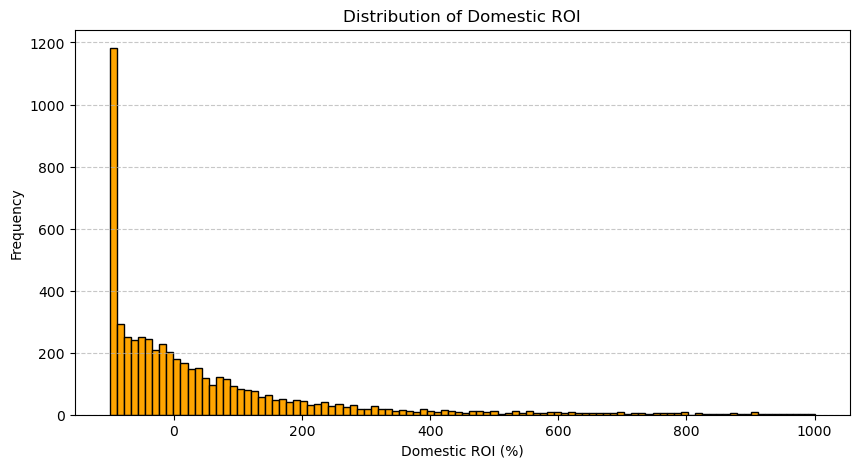

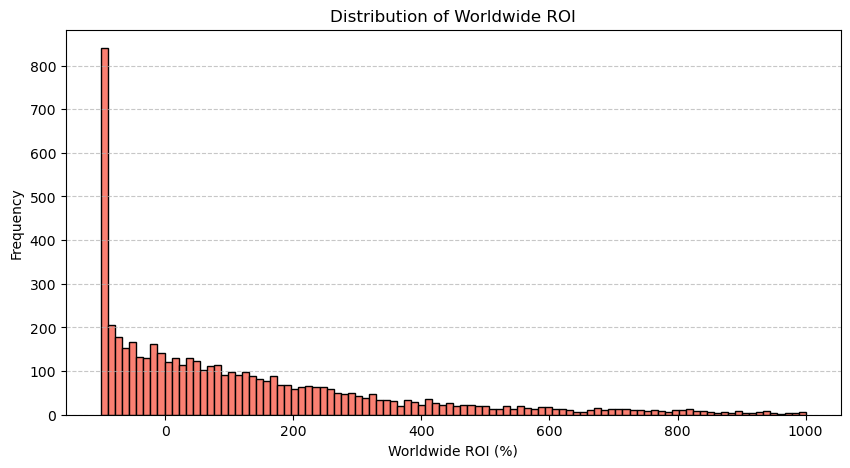

In [138]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for domestic ROI
plt.figure(figsize=(10, 5))
plt.hist(data2['domestic_roi'], bins=100, range=(-100, 1000), color='orange', edgecolor='black')
plt.xlabel('Domestic ROI (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Domestic ROI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a histogram for worldwide ROI
plt.figure(figsize=(10, 5))
plt.hist(data2['worldwide_roi'], bins=100, range=(-100, 1000), color='salmon', edgecolor='black')
plt.xlabel('Worldwide ROI (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Worldwide ROI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




x axis represents ROI values while the y axis represents frequency(number of movies with a particular value)

There is not such a concise positive correlation, hinting that the relationship between production budget and ROI might ave other factors at play

SCATTER PLOT to visualze relationship between the ROI and production budget

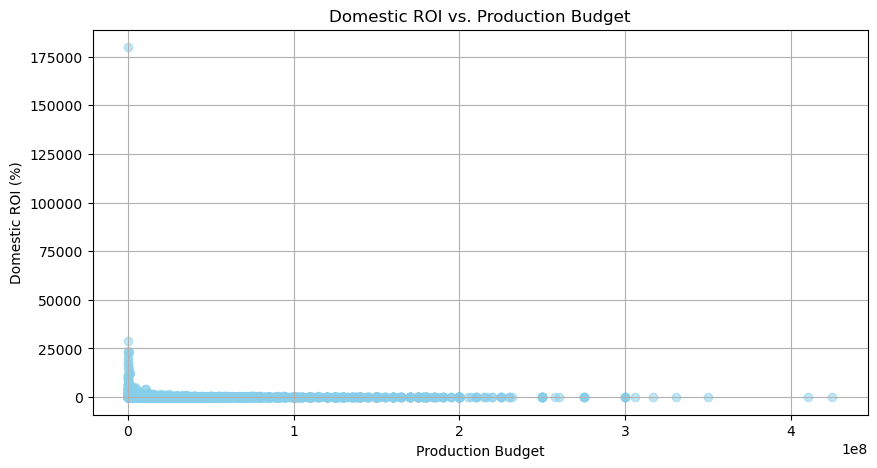

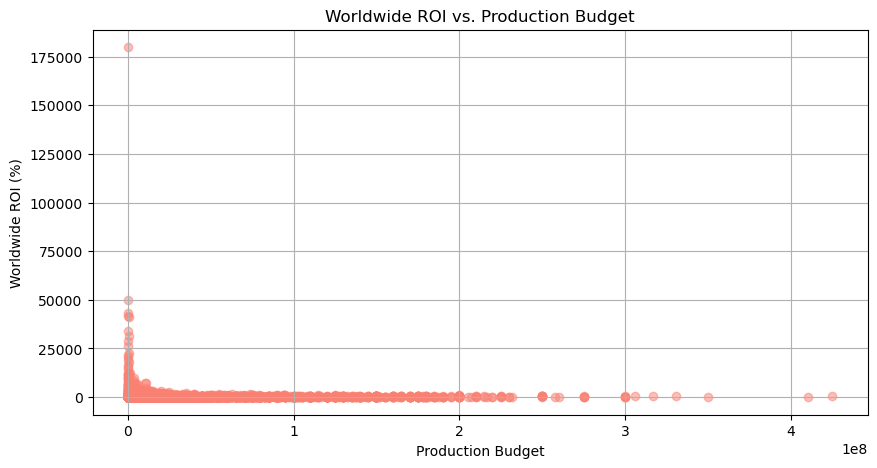

In [113]:
import matplotlib.pyplot as plt

# Scatter plot for domestic ROI vs. production budget
plt.figure(figsize=(10, 5))
plt.scatter(data2['production_budget'], data2['domestic_roi'], alpha=0.5, color='skyblue')
plt.xlabel('Production Budget')
plt.ylabel('Domestic ROI (%)')
plt.title('Domestic ROI vs. Production Budget')
plt.grid(True)
plt.show()

# Scatter plot for worldwide ROI vs. production budget
plt.figure(figsize=(10, 5))
plt.scatter(data2['production_budget'], data2['worldwide_roi'], alpha=0.5, color='salmon')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide ROI (%)')
plt.title('Worldwide ROI vs. Production Budget')
plt.grid(True)
plt.show()


Presence of significant outliers could be the cause for no clreat trend in the relationship between Roi and production budget. I have chosen to keep the outliers in the data because movies are different and require different factors to ensure their success.

RECOMMENDATIONS 


Due to the lack of clear budget ROI correlation, Microsoft should consider that maybe higher budget does not ensure a high ROI in return. 
Further market reseach and analysis will be crucial since solely relying on high budgets  as an investment strategy can be  risk.
Ultimately the film industry is influenced by other factors beyond budget. 






OBJECTIVE 3: 

To investigate whether movies with more votes tend to have higher ratings.

This objective aims to undestand if popularity of a movie directly means that the movie is highly related. There is a fine line between these 2 variables. Popularity measures the level of engagement accorded to a movie, whereas a rating could be the collectice opinion accorded to it.

Lets take a look at the movie_ratings table. It contains    entries, with no missing values in either of the tables. I would assume that since each movie is different any outliers would be an indication of the real bias of the audience towards the specific show which is expected to also reflect in the earnings.

DATA CLEANING

Check the data types for the columns:

In [114]:
votess = df1['numvotes'].dtype
votess

dtype('int64')

In [115]:
rating = df1['averagerating'].dtype
rating

dtype('float64')

The columns are in correct type

Lets check for outliers in the data, especially the votes column

In [121]:
Q1 = df1['numvotes'].quantile(0.25)
Q3 = df1['numvotes'].quantile(0.75)
iqr = Q3-Q1
outliers = df1[(df1['numvotes'] < Q1 - 1.5 * iqr) | (df1['numvotes'] > Q3 + 1.5 * iqr)]
outliers_values = outliers['numvotes']
outliers_values

3        50352
6         1613
10        8296
11        2381
12        5494
         ...  
73771     5863
73772     1526
73792     1778
73814      710
73831     4057
Name: numvotes, Length: 11758, dtype: int64

11,758 records containing outliers. Lets remove them so that we can focus on the central tendency measures of the data

In [123]:

Q1 = df1['numvotes'].quantile(0.25)
Q3 = df1['numvotes'].quantile(0.75)
iqr = Q3 - Q1

#Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

# Filter the DataFrame 
df1= df1[(df1['numvotes'] >= lower_bound) & (df1['numvotes'] <= upper_bound)]


In [124]:
df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
4,tt1060240,6.5,21
5,tt1069246,6.2,326
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


ANALYSIS

Lets calculate mean for both columns

In [125]:
mean_votes = df1['numvotes'].mean()
mean_votes

96.13304776321299

In [126]:
average_rating = df1['averagerating'].mean()
average_rating

6.361079261811974

Movies in this dataset receie an average of around 96 votes, and on avaerage, they also receive a rating of 6/10.Votes can be equated to engagement whereas ratings can be said to be a measure of quaity based on their honest critic.

Calculating the correlation coefficient  between the number of votes and ratings. This analysis will be essential because it will provide numerical strength in the relationship between number of votes a particular movie has and the average rating it has also. 

This information, apart from validating the strength of the relationship it highlights information about audience behaavior and what moves decision making 

In [127]:
correlation_check = df1['numvotes'].corr(df1['averagerating'])
correlation_check

-0.21827468302445752

-0.2182... is a relatively strong negative correlation.This suggests that movies with more votes tend to have lower ratings on average. Since correlation does not always infer causation and keeping in mind that we have removed outliers i order to focus on the central tendency of th data it could also be that in some cases movies with more votes have higer ratings but not always. 

Movie ratings are affected by alot of things whereas movie popularity depend solely/ majorly on audience votes. Lack of a substantially positive correlation could be an indication of no clear pattern between the 2 variables

Still this negative correlation doesn't mean that more votes automatically equal lower ratings.

VISUALIZATIONS

Lets plot scatters, since they can best describe relationships between 2 variables, making them useful to validate correlations. Adding a regression line to a scatter plot helps to ientify if te relationship is positive or negative

/home/marie/.conda/envs/learn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/marie/.conda/envs/learn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


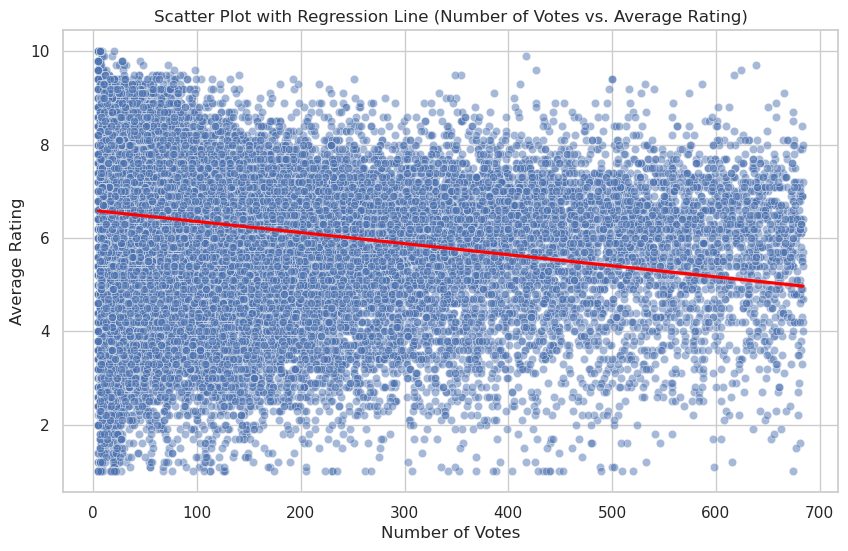

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numvotes', y='averagerating', data=df1, alpha=0.5)

# Add a regression line
sns.regplot(x='numvotes', y='averagerating', data=df1, scatter=False, color='red')

# Customize labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.title('Scatter Plot with Regression Line (Number of Votes vs. Average Rating)')

# Show the plot
plt.show()

Based on the above visualizations, it is possible to infer that a negative correlation truly exixts betweeen the number of votes a movie gets and the total average ratig it can get over the period of release. This could mean that as the number of votes increase, the average rating tends to decrease

RECOMMENDATIONS

Since a negative correlation suggests an inverse relationship bbetween votes and ratings it still doesnt rule out the fact that in some cases a large audience engagement directly translates to a higher rating. 

Therefore Microsoft can consider  strategies to boost user engagement since user engagement abd he feedback from that excercise is still is a depiction of the user experience.

A negative correlation might be because of other factors like video quality, and how well the movie explores different ongoing global or local themes.Microsoft should ensure that quality assurance tests are done to confirm that all indusrty standards are being met.